In [1]:
from pathlib import Path
import io
from pprint import pprint
from PIL import Image
import torch

In [2]:
def load_all_checkpoints(ticker: str):
    """
    Load every checkpoint matching `{ticker}_*.pth` in the current working directory.
    For each checkpoint:
      1) load checkpoint dict (CPU),
      2) print hparams and train/val metrics,
      3) display train plot if present,
    """
    cwd = Path.cwd()
    ckpt_paths = sorted(cwd.glob(f"{ticker}_*.pth"))

    loaded = {}
    for p in ckpt_paths:
        print("Loading checkpoint:", p)
        ckpt = torch.load(p, map_location="cpu", weights_only=False)

        print("\nHyperparameters:")
        pprint(ckpt.get("hparams", {}))

        if "train_plot_png" in ckpt:
            try:
                img = Image.open(io.BytesIO(ckpt["train_plot_png"]))
                display(img)
            except Exception:
                print("  (train_plot_png present but could not display)")

        print("\nTrain metrics:", ckpt.get("train_metrics"))
        print(" Val metrics:", ckpt.get("val_metrics"))
        print('\n------------------------------------------------------------------------------------------------------------------------------\n')

    return loaded


Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.09023_fin.pth

Hyperparameters:
{'ALPHA_SMOOTH': 0.0,
 'CLIPNORM': 1.7,
 'CONV_CHANNELS': 64,
 'CONV_DILATION': 1,
 'CONV_K': 3,
 'DROPOUT_LONG': 0.1,
 'DROPOUT_SHORT': 0.2,
 'DROPOUT_TRANS': 0.1,
 'EARLY_STOP_PATIENCE': 7,
 'FLATTEN_MODE': 'last',
 'LAMBDA_DELTA': 0.01,
 'LONG_UNITS': 96,
 'LOOK_BACK': 60,
 'MAX_EPOCHS': 70,
 'MICRO_SAMPLE_K': 16,
 'ONECYCLE_DIV_FACTOR': 10,
 'ONECYCLE_FINAL_DIV': 100,
 'ONECYCLE_MAX_LR': 0.0007,
 'ONECYCLE_PCT_START': 0.1,
 'ONECYCLE_STRATEGY': 'cos',
 'PRED_HIDDEN': 128,
 'SHORT_UNITS': 128,
 'TCN_CHANNELS': 64,
 'TCN_KERNEL': 3,
 'TCN_LAYERS': 2,
 'TRAIN_BATCH': 16,
 'TRAIN_PREFETCH_FACTOR': 4,
 'TRAIN_WORKERS': 8,
 'TRANSFORMER_D_MODEL': 128,
 'TRANSFORMER_FF_MULT': 4,
 'TRANSFORMER_HEADS': 4,
 'TRANSFORMER_LAYERS': 2,
 'USE_CONV': False,
 'USE_DELTA': False,
 'USE_LONG_LSTM': False,
 'USE_SHORT_LSTM': True,
 'USE_TCN': False,
 'USE_TRANSFORMER': True,
 'VAL_BATCH':

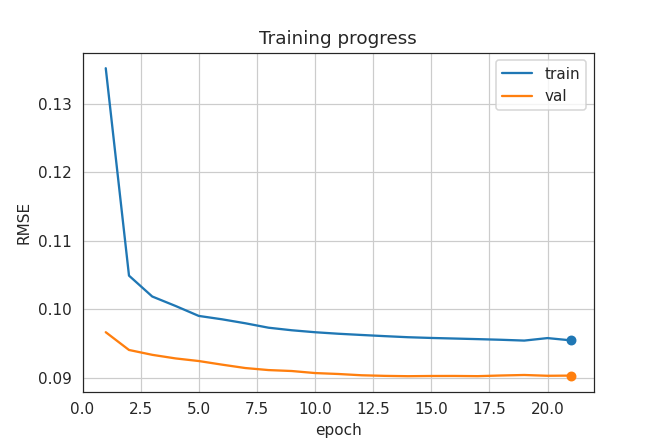


Train metrics: {'rmse': 0.09546201331923256, 'mae': 0.06545729343899785, 'r2': 0.29621087392266376}
 Val metrics: {'rmse': 0.09031640964518883, 'mae': 0.061423311404008536, 'r2': 0.30865005948135604}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.09025_fin.pth

Hyperparameters:
{'ALPHA_SMOOTH': 0.0,
 'CLIPNORM': 1,
 'CONV_CHANNELS': 64,
 'CONV_DILATION': 1,
 'CONV_K': 3,
 'DROPOUT_LONG': 0.1,
 'DROPOUT_SHORT': 0.2,
 'DROPOUT_TRANS': 0.1,
 'EARLY_STOP_PATIENCE': 7,
 'FLATTEN_MODE': 'last',
 'LAMBDA_DELTA': 0.01,
 'LONG_UNITS': 96,
 'LOOK_BACK': 60,
 'MAX_EPOCHS': 70,
 'MICRO_SAMPLE_K': 16,
 'ONECYCLE_DIV_FACTOR': 10,
 'ONECYCLE_FINAL_DIV': 100,
 'ONECYCLE_MAX_LR': 0.001,
 'ONECYCLE_PCT_START': 0.1,
 'ONECYCLE_STRATEGY': 'cos',
 'PRED_HIDDEN': 128,
 'SHORT_UNITS': 128,
 'TCN_CHANNELS': 64,
 'TCN_KERNEL': 3,
 'TCN_LAYERS': 2,

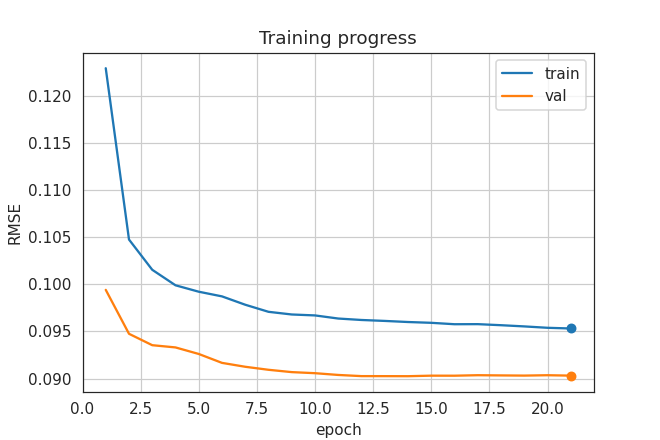


Train metrics: {'rmse': 0.09530684175192787, 'mae': 0.06538745056315616, 'r2': 0.29849700429444503}
 Val metrics: {'rmse': 0.09031104834242103, 'mae': 0.061306704761455444, 'r2': 0.30873213595786153}

------------------------------------------------------------------------------------------------------------------------------

Loading checkpoint: /workspace/my_models/Trading/_Stock_Analysis_/trainings/AAPL_0.09028_fin.pth

Hyperparameters:
{'ALPHA_SMOOTH': 0.0,
 'CLIPNORM': 3,
 'CONV_CHANNELS': 64,
 'CONV_DILATION': 1,
 'CONV_K': 3,
 'DROPOUT_LONG': 0.1,
 'DROPOUT_SHORT': 0.15,
 'DROPOUT_TRANS': 0.05,
 'EARLY_STOP_PATIENCE': 7,
 'FLATTEN_MODE': 'last',
 'LAMBDA_DELTA': 0.01,
 'LONG_UNITS': 96,
 'LOOK_BACK': 60,
 'MAX_EPOCHS': 70,
 'MICRO_SAMPLE_K': 16,
 'ONECYCLE_DIV_FACTOR': 10,
 'ONECYCLE_FINAL_DIV': 100,
 'ONECYCLE_MAX_LR': 0.0005,
 'ONECYCLE_PCT_START': 0.1,
 'ONECYCLE_STRATEGY': 'cos',
 'PRED_HIDDEN': 128,
 'SHORT_UNITS': 128,
 'TCN_CHANNELS': 64,
 'TCN_KERNEL': 3,
 'TCN_LAYERS':

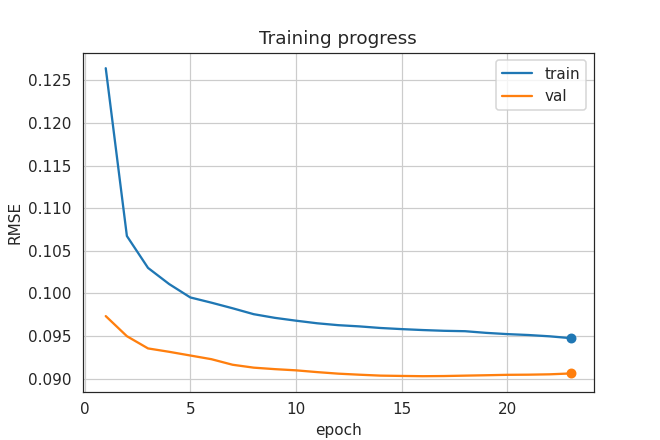


Train metrics: {'rmse': 0.09474138502462431, 'mae': 0.06509432424031003, 'r2': 0.306796363668267}
 Val metrics: {'rmse': 0.09059829915679629, 'mae': 0.06148067775866468, 'r2': 0.3043277347180334}

------------------------------------------------------------------------------------------------------------------------------



{}

In [3]:
load_all_checkpoints("AAPL")